In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
diamonds = pd.read_csv('./data/diamonds.csv')

In [3]:
diamonds.head()

,price,carat,city,depth,table,x,y,z,cut,color,clarity
0,4268,1.21,Dubai,62.4,58.0,6.83,6.79,4.25,Premium,J,VS2
1,505,0.32,Kimberly,63.0,57.0,4.35,4.38,2.75,Very Good,H,VS2
2,2686,0.71,Las Vegas,65.5,55.0,5.62,5.53,3.65,Fair,G,VS1
3,738,0.41,Kimberly,63.8,56.0,4.68,4.72,3.00,Good,D,SI1
4,4882,1.02,Dubai,60.5,59.0,6.55,6.51,3.95,Ideal,G,SI1


In [4]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   price    40455 non-null  int64  
 1   carat    40455 non-null  float64
 2   city     40455 non-null  object 
 3   depth    40455 non-null  float64
 4   table    40455 non-null  float64
 5   x        40455 non-null  float64
 6   y        40455 non-null  float64
 7   z        40455 non-null  float64
 8   cut      40455 non-null  object 
 9   color    40455 non-null  object 
 10  clarity  40455 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 3.4+ MB


In [6]:
diamonds.isnull().sum()

price      0
carat      0
city       0
depth      0
table      0
x          0
y          0
z          0
cut        0
color      0
clarity    0
dtype: int64

In [8]:
# No nulls, good news

In [9]:
diamonds.describe()

,price,carat,depth,table,x,y,z
count,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000
mean,3928.444469,0.797706,61.752841,57.446133,5.729392,5.732819,3.537154
std,3992.416147,0.475544,1.431725,2.233535,1.124453,1.146650,0.697062
min,326.000000,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000
25%,945.000000,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000
50%,2397.000000,0.700000,61.800000,57.000000,5.690000,5.710000,3.520000
75%,5331.000000,1.040000,62.500000,59.000000,6.540000,6.540000,4.035000
max,18823.000000,4.500000,79.000000,95.000000,10.230000,58.900000,8.060000


In [10]:
# Precio medio 3.928€ desde un mínimo 326 hasta un máximo de 18.823€ > Tenemos outliers 
# Además el valor mínimo de x, y y z es de 0

In [8]:
cero_x = diamonds['x'] == 0
cero_y = diamonds['y'] == 0
cero_z = diamonds['z'] == 0

In [10]:
cero_x.sum()

5

In [11]:
cero_y.sum()

4

In [12]:
cero_z.sum()

16

In [13]:
# Tenemos 5 filas en x, 4 filas en y y 16 filas en z cuyo valor es 0

## Collinearity

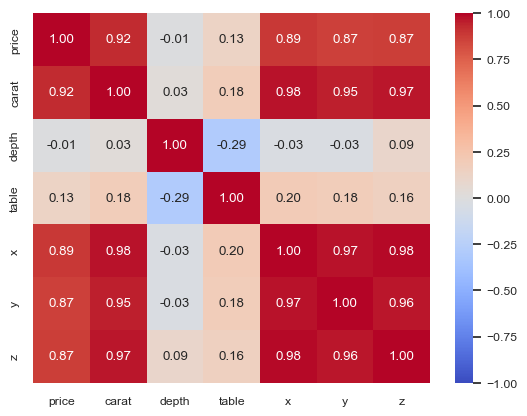

In [14]:
num_cols = diamonds.select_dtypes(include = ["int16", "int32", "int64", "float16", "float32", "float64"])

sns.set(font_scale=0.8)

sns.heatmap(num_cols.corr(), vmin=-1, vmax=+1, annot=True, cmap="coolwarm", fmt='.2f')
plt.show()

In [ ]:
# La columna depth no me aporta NADA sobre el precio

## ⚠️⚠️ DECISION

In [25]:
# Me cargo la columna de depth

In [28]:
diamonds = diamonds.drop('depth', axis=1)

In [29]:
diamonds.head()

,price,carat,city,table,x,y,z,cut,color,clarity,continent
0,4268,1.21,Dubai,58.0,6.83,6.79,4.25,Premium,J,VS2,Asia
1,505,0.32,Kimberly,57.0,4.35,4.38,2.75,Very Good,H,VS2,Africa
2,2686,0.71,Las Vegas,55.0,5.62,5.53,3.65,Fair,G,VS1,America
3,738,0.41,Kimberly,56.0,4.68,4.72,3.00,Good,D,SI1,Africa
4,4882,1.02,Dubai,59.0,6.55,6.51,3.95,Ideal,G,SI1,Asia


## Encoding Categorical Data

In [11]:
diamonds['city'].value_counts()

city
Surat            5073
Antwerp          5047
Kimberly         4976
Luxembourg       2606
Las Vegas        2586
New York City    2586
Dubai            2561
Madrid           2540
Paris            2530
Tel Aviv         2505
Zurich           2497
Amsterdam        2485
London           2463
Name: count, dtype: int64

In [12]:
diamonds['city'].unique()

array(['Dubai', 'Kimberly', 'Las Vegas', 'Tel Aviv', 'Amsterdam',
       'Zurich', 'Antwerp', 'Madrid', 'Paris', 'Surat', 'Luxembourg',
       'London', 'New York City'], dtype=object)

## ⚠️⚠️ DECISION

In [13]:
''' 
No quiero eliminar por completo la columna de ciudad porque quizá sea relevante para los precios, 
pero tener 13 columnas añadidas me parece excesivo. 
Solución: voy a agrupar las ciudades por su continente, así podré comparar entre Asia, África, Europa o América'''

' \nPrimera decisión: no quiero eliminar por completo la columna de ciudad porque quizá sea relevante para los precios, \npero tener 13 columnas añadidas me parece excesivo. \nSolución: voy a agrupar las ciudades por su continente, así podré comparar entre Asia, África, Europa o América'

In [14]:
city_map = {
    'Dubai': 'Asia',
    'Kimberly': 'Africa',
    'Las Vegas': 'America',
    'Tel Aviv': 'Asia',
    'Amsterdam': 'Europe',
    'Zurich': 'Europe',
    'Antwerp': 'Europe',
    'Madrid': 'Europe',
    'Paris': 'Europe',
    'Surat': 'Asia',
    'Luxembourg': 'Europe',
    'London': 'Europe',
    'New York City': 'America'
}

In [15]:
diamonds['continent'] = diamonds['city'].map(city_map)

In [44]:
diamonds = diamonds.drop('city', axis=1)

In [18]:
diamonds['cut'].value_counts()

cut
Ideal        16220
Premium      10260
Very Good     9095
Good          3663
Fair          1217
Name: count, dtype: int64

In [19]:
# Cut se queda como está

In [20]:
diamonds['color'].value_counts()

color
G    8455
E    7325
F    7177
H    6277
D    5049
I    4032
J    2140
Name: count, dtype: int64

In [ ]:
# Color me genera dudas, por ahora se queda como está 

In [31]:
diamonds['clarity'].value_counts()

clarity
SI1     9749
VS2     9248
SI2     6929
VS1     6066
VVS2    3799
VVS1    2774
IF      1327
I1       563
Name: count, dtype: int64

In [32]:
diamonds['clarity'].unique()

array(['VS2', 'VS1', 'SI1', 'SI2', 'IF', 'VVS1', 'VVS2', 'I1'],
      dtype=object)

## ⚠️⚠️ DECISION

In [33]:
# Vamos a hacer lo mismo que con city, lo agrupamos y reducimos la dimensionalidad

In [36]:
diamonds['clarity'] = diamonds['clarity'].replace(['IF'], ['VVSI']).replace(['VVS1'], ['VVSI']).replace(['VVS2'], ['VVSI'])
# VVSI = Very Very Sligthly Included, incluye IF (Internally Flawless, VVS1 y VVS2 (Very, Very Slightly Included 1 y 2))

In [37]:
diamonds['clarity'] = diamonds['clarity'].replace(['VS1'], ['VSI']).replace(['VS2'], ['VSI'])
# VVS = Very Slightly Included, incluye Very Slightly Included 1 y 2 

In [39]:
diamonds['clarity'] = diamonds['clarity'].replace(['SI1'], ['SI']).replace(['SI2'], ['SI'])
# SI = Slightly Included, incluye Slightly Included 1 y 2 

In [40]:
diamonds['clarity'].value_counts()

clarity
SI      16678
VSI     15314
VVSI     7900
I1        563
Name: count, dtype: int64

In [45]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   price      40455 non-null  int64  
 1   carat      40455 non-null  float64
 2   table      40455 non-null  float64
 3   x          40455 non-null  float64
 4   y          40455 non-null  float64
 5   z          40455 non-null  float64
 6   cut        40455 non-null  object 
 7   color      40455 non-null  object 
 8   clarity    40455 non-null  object 
 9   continent  40455 non-null  object 
dtypes: float64(5), int64(1), object(4)
memory usage: 3.1+ MB


In [46]:
diamonds_dummy = pd.get_dummies(diamonds, drop_first=True, dtype=float)

In [47]:
diamonds_dummy.head()

,price,carat,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_G,color_H,color_I,color_J,clarity_SI,clarity_VSI,clarity_VVSI,continent_America,continent_Asia,continent_Europe
0,4268,1.21,58.0,6.83,6.79,4.25,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,505,0.32,57.0,4.35,4.38,2.75,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2686,0.71,55.0,5.62,5.53,3.65,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,738,0.41,56.0,4.68,4.72,3.00,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,4882,1.02,59.0,6.55,6.51,3.95,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [48]:
diamonds_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              40455 non-null  int64  
 1   carat              40455 non-null  float64
 2   table              40455 non-null  float64
 3   x                  40455 non-null  float64
 4   y                  40455 non-null  float64
 5   z                  40455 non-null  float64
 6   cut_Good           40455 non-null  float64
 7   cut_Ideal          40455 non-null  float64
 8   cut_Premium        40455 non-null  float64
 9   cut_Very Good      40455 non-null  float64
 10  color_E            40455 non-null  float64
 11  color_F            40455 non-null  float64
 12  color_G            40455 non-null  float64
 13  color_H            40455 non-null  float64
 14  color_I            40455 non-null  float64
 15  color_J            40455 non-null  float64
 16  clarity_SI         404

In [49]:
diamonds_dummy.describe()

,price,carat,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_G,color_H,color_I,color_J,clarity_SI,clarity_VSI,clarity_VVSI,continent_America,continent_Asia,continent_Europe
count,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,...,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000
mean,3928.444469,0.797706,57.446133,5.729392,5.732819,3.537154,0.090545,0.400939,0.253615,0.224818,...,0.208998,0.155160,0.099666,0.052898,0.412261,0.378544,0.195279,0.127846,0.250624,0.498529
std,3992.416147,0.475544,2.233535,1.124453,1.146650,0.697062,0.286965,0.490095,0.435085,0.417467,...,0.406598,0.362062,0.299558,0.223833,0.492248,0.485030,0.396420,0.333922,0.433378,0.500004
min,326.000000,0.200000,43.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,945.000000,0.400000,56.000000,4.710000,4.720000,2.910000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2397.000000,0.700000,57.000000,5.690000,5.710000,3.520000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5331.000000,1.040000,59.000000,6.540000,6.540000,4.035000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,18823.000000,4.500000,95.000000,10.230000,58.900000,8.060000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [60]:
diamonds_dummy.to_csv('./data/diamonds_dummy.csv', index=False)